## 1.载入数据及标准化

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


def standarlization(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std


def load_data(standarlized=True):
    data = load_breast_cancer()
    x, y = data.data, data.target.reshape(-1, 1)
    if standarlized:
        x = standarlization(x)
    return x, y

## 2.Sigmoid函数

In [2]:
def accuracy(y, y_pre):
    return np.mean((y.flatten() == y_pre.flatten()) * 1)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))


## 3.假设函数和预测函数

In [3]:
def hypothesis(X, W, bias):
    z = np.matmul(X, W) + bias
    h_x = sigmoid(z)
    return h_x


def prediction(X, W, bias, thre=0.5):
    h_x = hypothesis(X, W, bias)
    y_pre = (h_x > thre) * 1
    return y_pre

## 4.目标函数与梯度下降

In [4]:
def cost_function(X, y, W, bias):
    m, n = X.shape
    h_x = hypothesis(X, W, bias)
    cost = np.sum(y * np.log(h_x) + (1 - y) * np.log(1 - h_x))
    return -cost / m


def gradient_descent(X, y, W, bias, alpha):
    m, n = X.shape
    h_x = hypothesis(X, W, bias)
    grad_w = (1 / m) * np.matmul(X.T, (h_x - y))  # [n,m] @ [m,1]
    grad_b = (1 / m) * np.sum(h_x - y)
    W = W - alpha * grad_w  # 梯度下降
    bias = bias - alpha * grad_b
    return W, bias

## 5.模型训练

In [5]:
def train(X, y, ite=200):
    m, n = X.shape  # 506,13
    # W = np.random.randn(n, 1)
    W = np.random.uniform(-0.1, 0.1, n).reshape(n, 1)
    b = 0.1
    alpha = 0.08
    costs = []
    for i in range(ite):
        J = cost_function(X, y, W, b)
        costs.append(J)
        W, b = gradient_descent(X, y, W, b, alpha)
    y_pre = prediction(X, W, b)
    print("Results by implementation:")
    print(classification_report(y, y_pre))
    return costs


def train_by_sklearn(x, y):
    model = LogisticRegression(multi_class='ovr')
    model.fit(x, y.ravel())
    print("Accuracy by sklearn: ", model.score(x, y))

## 6.运行

Results by implementation:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       212
           1       0.98      0.99      0.99       357

    accuracy                           0.98       569
   macro avg       0.98      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569

Accuracy by sklearn:  0.9876977152899824


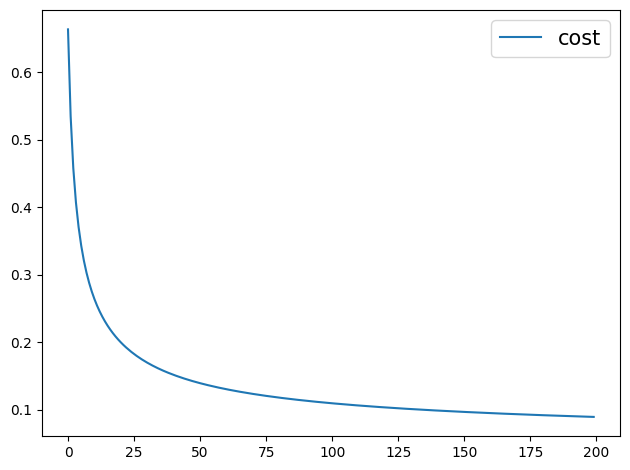

In [6]:
if __name__ == '__main__':
    x, y = load_data(standarlized=True)

    costs = train(x, y)
    train_by_sklearn(x, y)
    plt.plot(range(len(costs)), costs, label='cost')
    plt.legend(fontsize=15)
    plt.tight_layout()  # 调整子图间距
    plt.show()
